<a href="https://colab.research.google.com/github/luoChengwen/Tensorflow_test/blob/master/NLP_conv1D_IMDB_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conv1D


In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [0]:
# If the tf.__version__ is 1.x, please run this cell
# !pip install tensorflow==2.0.0-beta0

In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [0]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


W0811 01:35:02.860870 139925645924224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow_datasets/core/file_format_adapter.py:209: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


W0811 01:37:04.245035 139925645924224 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10


W0811 01:37:05.856342 139925645924224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


391/391 [==============================] - 291s 745ms/step - loss: 0.4444 - accuracy: 0.7800 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 263s 672ms/step - loss: 0.2199 - accuracy: 0.9177 - val_loss: 0.3036 - val_accuracy: 0.8790
Epoch 3/10
391/391 [==============================] - 258s 661ms/step - loss: 0.1690 - accuracy: 0.9366 - val_loss: 0.3276 - val_accuracy: 0.8737
Epoch 4/10
391/391 [==============================] - 255s 651ms/step - loss: 0.1371 - accuracy: 0.9505 - val_loss: 1.2919 - val_accuracy: 0.6858
Epoch 5/10
391/391 [==============================] - 256s 655ms/step - loss: 0.1114 - accuracy: 0.9615 - val_loss: 0.4407 - val_accuracy: 0.8631
Epoch 6/10
391/391 [==============================] - 254s 649ms/step - loss: 0.0810 - accuracy: 0.9762 - val_loss: 0.5229 - val_accuracy: 0.8575
Epoch 7/10
391/391 [==============================] - 252s 643ms/step - loss: 0.0675 - accuracy: 0.9778 - val_loss: 0.5643 - va

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

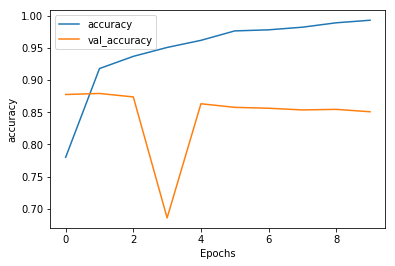

In [0]:
plot_graphs(history, 'accuracy')

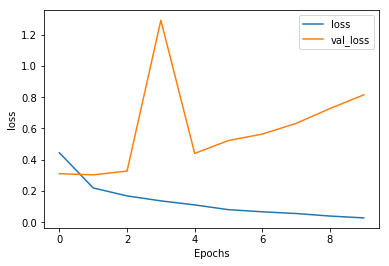

In [0]:
plot_graphs(history, 'loss')

In [0]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 8, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NUM_EPOCHS = 10
history = model2.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 458s 1s/step - loss: 0.4462 - accuracy: 0.7664 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
391/391 [==============================] - 419s 1s/step - loss: 0.2158 - accuracy: 0.9178 - val_loss: 0.2944 - val_accuracy: 0.8797
Epoch 3/10
391/391 [==============================] - 408s 1s/step - loss: 0.1555 - accuracy: 0.9462 - val_loss: 0.3098 - val_accuracy: 0.8792
Epoch 4/10
391/391 [==============================] - 408s 1s/step - loss: 0.1185 - accuracy: 0.9612 - val_loss: 0.3721 - val_accuracy: 0.8727
Epoch 5/10
391/391 [==============================] - 426s 1s/step - loss: 0.0861 - accuracy: 0.9734 - val_loss: 0.3690 - val_accuracy: 0.8699
Epoch 6/10
391/391 [==============================] - 425s 1s/step - loss: 0.0671 - accuracy: 0.9796 - val_loss: 0.4617 - val_accuracy: 0.8649
Epoch 7/10
391/391 [==============================] - 421s 1s/step - loss: 0.0499 - accuracy: 0.9860 - val_loss: 0.5483 - val_accuracy

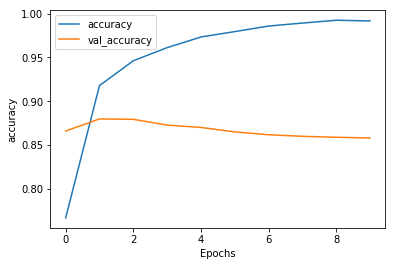

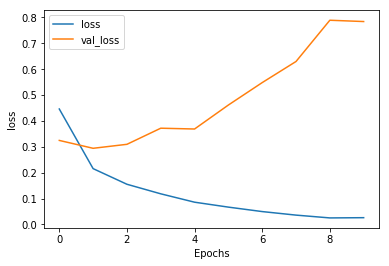

In [0]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')